# **Comparative Analysis of European Option Pricing: Binomial Trees vs. Black-Scholes**

## **🔍 Project Overview**

This notebook aims to provide a comprehensive comparative analysis of two fundamental models for pricing European options:

* **Black-Scholes Model (BSM):** A widely used analytical model based on continuous-time finance, assuming constant volatility and log-normal asset price distributions.
* **Binomial Tree Model (BTM):** A discrete-time numerical method that approximates option pricing by constructing a lattice of possible asset price paths.

This project will adhere to the requirements outlined in the **Finclub Summer Open Project 2025**, focusing on:
* Implementing both models for European call and put options.
* Calculating option Greeks using the Black-Scholes model.
* Analyzing the convergence of binomial pricing to Black-Scholes as the number of steps increases.
* Evaluating model sensitivity to key parameters.
* Comparing model outputs with real market data.
* Presenting a performance comparison, including pricing accuracy, computational efficiency, and error convergence, along with insightful visualizations.

## **📚 Fundamental Concepts & Parameters**

Before diving into the models, it's crucial to understand the common financial concepts and parameters that underpin both the Black-Scholes and Binomial Tree models. These are the building blocks for our option pricing calculations.

* **Underlying Asset Price (S):** The current market price of the asset on which the option is written (e.g., a stock, index, or ETF).
* **Strike Price (K):** The predetermined price at which the option holder can buy (call) or sell (put) the underlying asset.
* **Time to Maturity (T):** The remaining time until the option expires, typically expressed in years (e.g., 6 months = 0.5 years).
* **Risk-Free Interest Rate (r):** The theoretical rate of return on an investment with zero risk. This is usually the yield on government bonds for a period matching the option's maturity. We will use a continuously compounded rate.
* **Volatility ($\sigma$):** A measure of the expected fluctuations in the underlying asset's price. It's often the trickiest parameter to estimate and is expressed as an annualized standard deviation of the asset's returns.
* **Option Type:**
    * **Call Option:** Grants the holder the right, but not the obligation, to *buy* the underlying asset at the strike price.
    * **Put Option:** Grants the holder the right, but not the obligation, to *sell* the underlying asset at the strike price.
* **Dividend Yield (q):** For dividend-paying stocks, this is the annualized rate of dividends paid on the underlying asset. (While not explicitly mentioned for BSM in the problem, it's a good practice to acknowledge, especially if considering a generalized Black-Scholes).

Understanding these parameters is key to interpreting the inputs and outputs of our pricing models.

## **💭 Core Model Assumptions**

While both the Black-Scholes and Binomial Tree models aim to price European options, they are built upon different sets of assumptions regarding market behavior and asset price movements. Understanding these underlying assumptions is critical for appreciating their applicability and potential deviations from real-world scenarios.

### **Black-Scholes Model Assumptions:**

The Black-Scholes Model (BSM) is an analytical solution derived from a continuous-time framework. Its key assumptions include:

* **No Dividends:** The underlying asset pays no dividends during the option's life (though the formula can be adjusted for a continuous dividend yield).
* **Constant Volatility:** The volatility of the underlying asset is constant and known over the option's life.
* **Constant Risk-Free Rate:** The risk-free interest rate is constant and known.
* **Log-Normal Distribution:** The price of the underlying asset follows a log-normal distribution, implying that asset returns are normally distributed.
* **No Transaction Costs:** There are no commissions or transaction costs involved in buying or selling the option or the underlying asset.
* **Continuous Trading:** Trading is continuous, and prices move smoothly.
* **Efficient Markets:** All participants have access to the same information, and there are no arbitrage opportunities.
* **European-Style Options:** The option can only be exercised at expiry.

### **Binomial Tree Model Assumptions:**

The Binomial Tree Model (BTM) is a discrete-time model that can be adapted to various option types. Its primary assumptions are more flexible:

* **Discrete Price Movements:** The underlying asset price can only move to one of two possible prices (up or down) in any given time step.
* **No Arbitrage:** The model assumes no risk-free profit opportunities exist.
* **Risk-Neutral Valuation:** Options are priced in a risk-neutral world, meaning expected returns on all assets are the risk-free rate.
* **European-Style Options:** For our analysis, we will specifically apply it to European options, meaning exercise is only at maturity.
* **Constant Parameters (within steps):** While parameters can change between steps in more complex binomial models, for our basic implementation, we will typically assume constant volatility and risk-free rates across the entire tree.

**Why this distinction matters:** The Black-Scholes model, while elegant, is often criticized for its rigid assumptions (especially constant volatility). The Binomial Tree model, though computationally more intensive, offers greater flexibility to incorporate varying volatilities, dividends, and even early exercise features (for American options), making it a powerful tool beyond basic European options.

## **📐 Mathematical Foundations**

While we will implement these models in Python, it's essential to briefly understand the core mathematical principles behind them. This section will outline the fundamental formulas that drive our pricing functions.

### **Black-Scholes Model: The Analytical Solution**

The Black-Scholes model provides a closed-form analytical solution for the price of European options. Its elegance lies in its ability to directly calculate the option price based on the input parameters.

For a **European Call Option (C)**:
$C = S e^{-qT} N(d_1) - K e^{-rT} N(d_2)$

For a **European Put Option (P)**:
$P = K e^{-rT} N(-d_2) - S e^{-qT} N(-d_1)$

Where:
$d_1 = \frac{\ln(S/K) + (r - q + \sigma^2/2)T}{\sigma \sqrt{T}}$
$d_2 = d_1 - \sigma \sqrt{T}$

And:
* $S$: Current underlying asset price
* $K$: Strike price
* $T$: Time to maturity (in years)
* $r$: Risk-free interest rate (continuously compounded)
* $q$: Dividend yield (continuously compounded)
* $\sigma$: Volatility of the underlying asset's returns
* $N(x)$: Cumulative standard normal distribution function

### **Binomial Tree Model: The Iterative Approach**

The Binomial Tree Model (BTM) builds a discrete lattice of possible underlying asset prices over time. Option prices are then calculated by working backward from the expiry date (backward induction), using the concept of risk-neutral probabilities.

Key components for each step in the tree:

* **Up-factor (u):** $u = e^{\sigma \sqrt{\Delta t}}$
* **Down-factor (d):** $d = e^{-\sigma \sqrt{\Delta t}} = 1/u$
* **Risk-Neutral Probability of Up-Move (p):** $p = \frac{e^{(r-q)\Delta t} - d}{u - d}$
* **Risk-Neutral Probability of Down-Move (1-p):** $1 - p$
* **Discount Factor:** $e^{-r\Delta t}$

Where $\Delta t = T/N$ (time per step, with N being the number of steps).

The option value at each node is determined by discounting the expected future payoff based on risk-neutral probabilities:
$OptionValue = e^{-r\Delta t} [p \times OptionValue_{up} + (1-p) \times OptionValue_{down}]$

**Key Distinction:** BSM offers a direct answer, while BTM builds the answer step-by-step, making it more intuitive for visualizing price paths and adaptable for complex options (though we focus on European here).

Setting Up Our Environment - Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm

import yfinance as yf

from tqdm.notebook import tqdm

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('viridis')

import warnings
warnings.filterwarnings('ignore')

Black-Scholes Option Pricing Function

In [ ]:
def black_scholes(S, K, T, r, sigma, option_type='call', q=0):
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        price = S * np.exp(-q * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
        delta = np.exp(-q * T) * norm.cdf(d1)
        gamma = np.exp(-q * T) * norm.pdf(d1) / (S * sigma * np.sqrt(T))
        vega = S * np.exp(-q * T) * norm.pdf(d1) * np.sqrt(T)
        theta = - (S * np.exp(-q * T) * norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * norm.cdf(d2) + q * S * np.exp(-q * T) * norm.cdf(d1)
        rho = K * T * np.exp(-r * T) * norm.cdf(d2)

    elif option_type == 'put':
        price = K * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(-q * T) * norm.cdf(-d1)
        delta = np.exp(-q * T) * (norm.cdf(d1) - 1)
        gamma = np.exp(-q * T) * norm.pdf(d1) / (S * sigma * np.sqrt(T))
        vega = S * np.exp(-q * T) * norm.pdf(d1) * np.sqrt(T)
        theta = - (S * np.exp(-q * T) * norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * norm.cdf(-d2) - q * S * np.exp(-q * T) * norm.cdf(-d1)
        rho = -K * T * np.exp(-r * T) * norm.cdf(-d2)

    else:
        raise ValueError("Option type must be 'call' or 'put'.")

    return price, delta, gamma, vega, theta, rho

Binomial Tree Option Pricing Function

In [ ]:
def binomial_tree_pricing(S, K, T, r, sigma, N, option_type='call', q=0):
    # Calculate time step
    dt = T / N

    # Calculate up and down factors
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u

    # Calculate risk-neutral probability
    p = (np.exp((r - q) * dt) - d) / (u - d)

    # Initialize asset price tree at maturity
    # This vector holds all possible asset prices at time T
    St = np.zeros(N + 1)
    for i in range(N + 1):
        St[i] = S * (u**(N - i)) * (d**i)

    # Initialize option value at maturity
    # This vector holds option payoffs at maturity for each asset price
    option_values = np.zeros(N + 1)
    if option_type == 'call':
        option_values = np.maximum(St - K, 0)
    elif option_type == 'put':
        option_values = np.maximum(K - St, 0)
    else:
        raise ValueError("Option type must be 'call' or 'put'.")

    # Backward induction to find option value at time 0
    for j in range(N - 1, -1, -1):
        for i in range(j + 1):
            # Calculate option value at previous node
            option_values[i] = np.exp(-r * dt) * (p * option_values[i] + (1 - p) * option_values[i+1])

    # The first element is the option price at time 0
    return option_values[0]

Setting Up Parameters for Analysis

In [ ]:
# Define common parameters for a European option
S0 = 100            # Initial stock price
K = 100             # Strike price
T = 1               # Time to maturity in years (e.g., 1 year)
r = 0.05            # Annual risk-free rate (e.g., 5%)
sigma = 0.20        # Annual volatility (e.g., 20%)
q = 0.0             # Dividend yield (assuming no dividends for now)
N_steps_binomial = 1000 # Number of steps for the Binomial Tree model
option_type = 'call' # Type of option: 'call' or 'put'

# Printing parameters for clarity
print(f"Option Parameters:")
print(f"  Underlying Price (S0): {S0}")
print(f"  Strike Price (K): {K}")
print(f"  Time to Maturity (T): {T} years")
print(f"  Risk-Free Rate (r): {r*100:.2f}%")
print(f"  Volatility (sigma): {sigma*100:.2f}%")
print(f"  Dividend Yield (q): {q*100:.2f}%")
print(f"  Binomial Tree Steps (N): {N_steps_binomial}")
print(f"  Option Type: {option_type.capitalize()}")

Option Parameters:
  Underlying Price (S0): 100
  Strike Price (K): 100
  Time to Maturity (T): 1 years
  Risk-Free Rate (r): 5.00%
  Volatility (sigma): 20.00%
  Dividend Yield (q): 0.00%
  Binomial Tree Steps (N): 1000
  Option Type: Call


Calculating Option Prices and Greeks

In [ ]:
# Calculating Black-Scholes price and Greeks
bs_price, bs_delta, bs_gamma, bs_vega, bs_theta, bs_rho = black_scholes(
    S0, K, T, r, sigma, option_type, q
)

# Calculating Binomial Tree price
bt_price = binomial_tree_pricing(
    S0, K, T, r, sigma, N_steps_binomial, option_type, q
)

# Displaying results
print(f"Black-Scholes {option_type.capitalize()} Option Price: {bs_price:.4f}")
print(f"  Delta: {bs_delta:.4f}")
print(f"  Gamma: {bs_gamma:.4f}")
print(f"  Vega: {bs_vega:.4f}")
print(f"  Theta: {bs_theta:.4f}")
print(f"  Rho: {bs_rho:.4f}")
print("-" * 40)
print(f"Binomial Tree ({N_steps_binomial} steps) {option_type.capitalize()} Option Price: {bt_price:.4f}")

Black-Scholes Call Option Price: 10.4506
  Delta: 0.6368
  Gamma: 0.0188
  Vega: 37.5240
  Theta: -6.4140
  Rho: 53.2325
----------------------------------------
Binomial Tree (1000 steps) Call Option Price: 10.4486


Binomial Tree Convergence Analysis

In [ ]:
# Defining a range of steps for convergence analysis
num_steps_range = np.arange(10, 2001, 50) # From 10 to 2000 steps, in increments of 50
binomial_prices_convergence = []

# Iterating through different numbers of steps and calculate binomial prices
for N in tqdm(num_steps_range, desc="Calculating Binomial Convergence"):
    price = binomial_tree_pricing(S0, K, T, r, sigma, N, option_type, q)
    binomial_prices_convergence.append(price)

# Converting results to a NumPy array for easier plotting
binomial_prices_convergence = np.array(binomial_prices_convergence)

print("Binomial Tree Convergence Analysis Complete.")

Calculating Binomial Convergence:   0%|          | 0/40 [00:00<?, ?it/s]

Binomial Tree Convergence Analysis Complete.


Visualizing Binomial Tree Convergence

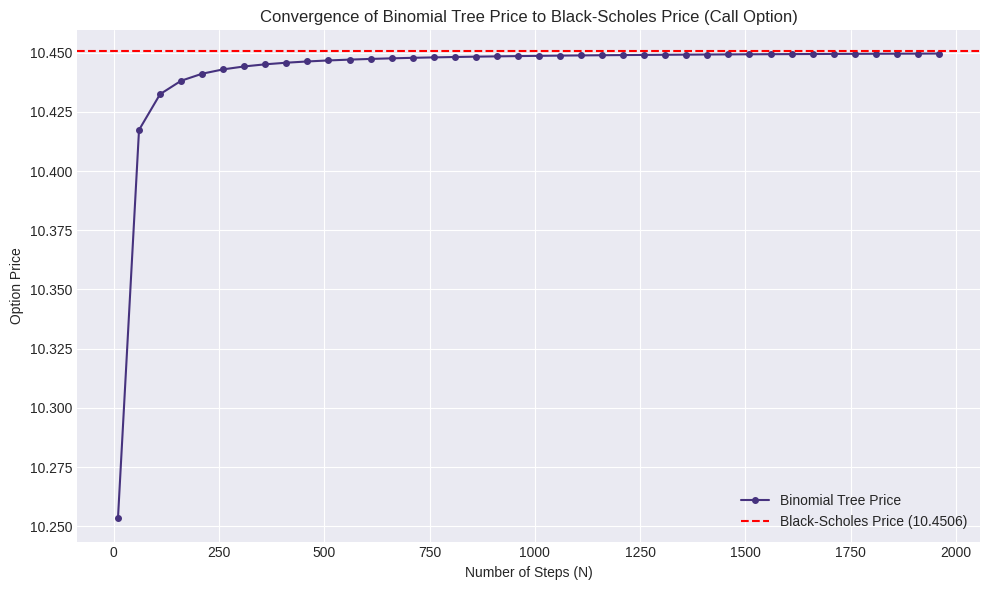

Difference between Binomial Tree price (N=1960) and Black-Scholes price: 0.001020


In [ ]:
# Create the plot for convergence
plt.figure(figsize=(10, 6))
plt.plot(num_steps_range, binomial_prices_convergence, label='Binomial Tree Price', marker='o', markersize=4, linestyle='-')
plt.axhline(y=bs_price, color='r', linestyle='--', label=f'Black-Scholes Price ({bs_price:.4f})') # Add horizontal line for Black-Scholes price

# Adding plot title and labels
plt.title(f'Convergence of Binomial Tree Price to Black-Scholes Price ({option_type.capitalize()} Option)')
plt.xlabel('Number of Steps (N)')
plt.ylabel('Option Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Calculating the final difference (error) at the highest number of steps
final_error = np.abs(binomial_prices_convergence[-1] - bs_price)
print(f"Difference between Binomial Tree price (N={num_steps_range[-1]}) and Black-Scholes price: {final_error:.6f}")

Volatility Sensitivity Analysis

In [ ]:
# Define a range of volatilities for sensitivity analysis
volatility_range = np.linspace(0.10, 0.50, 50) # From 10% to 50% volatility

# Store results for plotting
bs_prices_vol = []
bt_prices_vol = []

# Iterate through the volatility range
for vol in volatility_range:
    # Black-Scholes price for current volatility
    bs_price_at_vol, _, _, _, _, _ = black_scholes(S0, K, T, r, vol, option_type, q)
    bs_prices_vol.append(bs_price_at_vol)

    # Binomial Tree price for current volatility
    bt_price_at_vol = binomial_tree_pricing(S0, K, T, r, vol, N_steps_binomial, option_type, q)
    bt_prices_vol.append(bt_price_at_vol)

print("Volatility Sensitivity Analysis Complete.")

Volatility Sensitivity Analysis Complete.


Visualizing Volatility Sensitivity

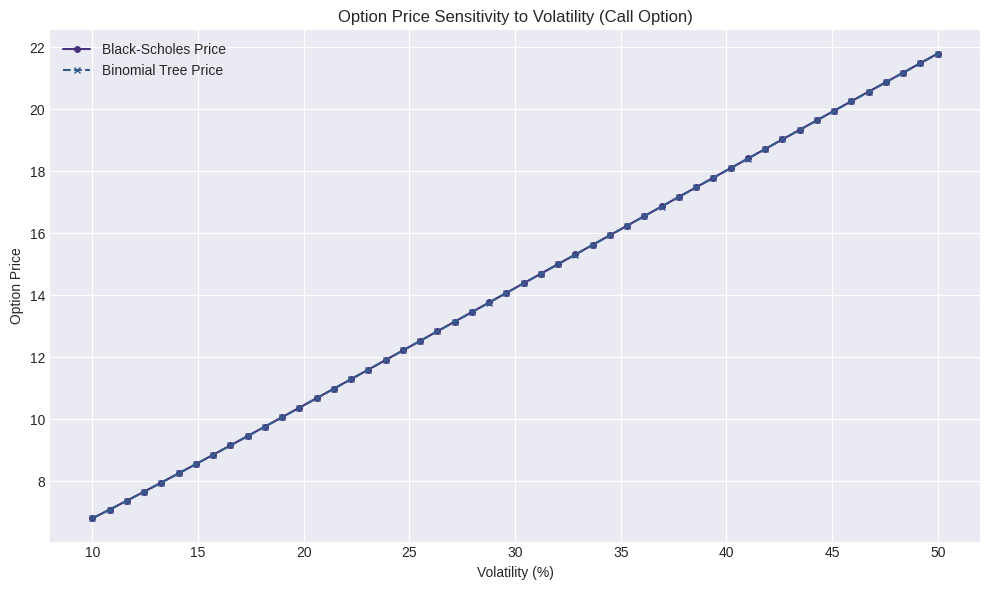

In [ ]:
# Create the plot for volatility sensitivity
plt.figure(figsize=(10, 6))
plt.plot(volatility_range * 100, bs_prices_vol, label='Black-Scholes Price', linestyle='-', marker='o', markersize=4)
plt.plot(volatility_range * 100, bt_prices_vol, label='Binomial Tree Price', linestyle='--', marker='x', markersize=4)

# Add plot title and labels
plt.title(f'Option Price Sensitivity to Volatility ({option_type.capitalize()} Option)')
plt.xlabel('Volatility (%)')
plt.ylabel('Option Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Time to Maturity Sensitivity Analysis

In [ ]:
# Define a range of times to maturity for sensitivity analysis
maturity_range = np.linspace(0.1, 2.0, 50) # From 0.1 years to 2.0 years

# Store results for plotting
bs_prices_T = []
bt_prices_T = []

# Iterate through the maturity range
for mat in maturity_range:
    # Black-Scholes price for current maturity
    bs_price_at_T, _, _, _, _, _ = black_scholes(S0, K, mat, r, sigma, option_type, q)
    bs_prices_T.append(bs_price_at_T)

    # Binomial Tree price for current maturity
    bt_price_at_T = binomial_tree_pricing(S0, K, mat, r, sigma, N_steps_binomial, option_type, q)
    bt_prices_T.append(bt_price_at_T)

print("Time to Maturity Sensitivity Analysis Complete.")

Time to Maturity Sensitivity Analysis Complete.


Visualizing Time to Maturity Sensitivity

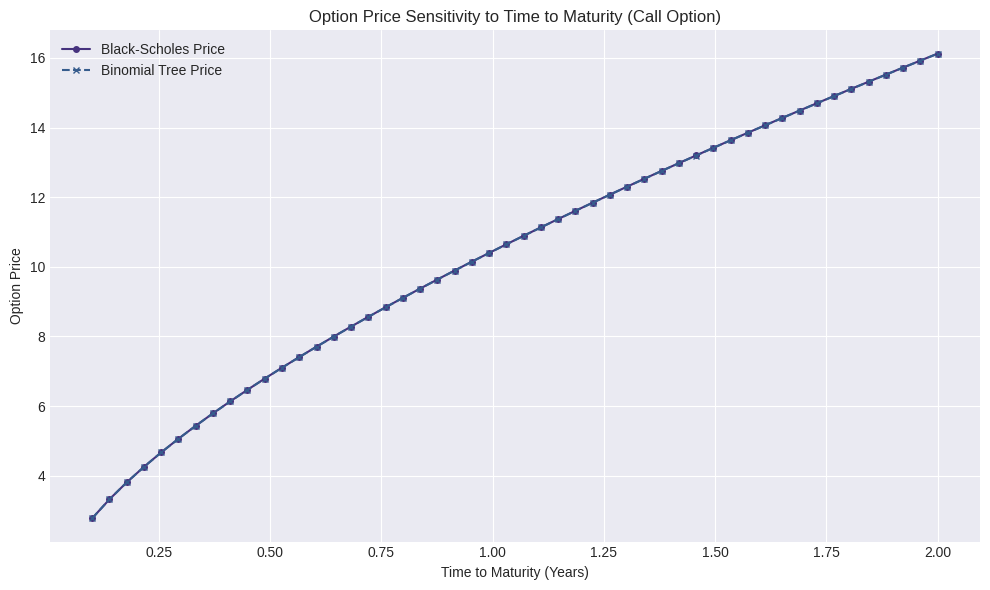

In [ ]:
# Create the plot for time to maturity sensitivity
plt.figure(figsize=(10, 6))
plt.plot(maturity_range, bs_prices_T, label='Black-Scholes Price', linestyle='-', marker='o', markersize=4)
plt.plot(maturity_range, bt_prices_T, label='Binomial Tree Price', linestyle='--', marker='x', markersize=4)

# Add plot title and labels
plt.title(f'Option Price Sensitivity to Time to Maturity ({option_type.capitalize()} Option)')
plt.xlabel('Time to Maturity (Years)')
plt.ylabel('Option Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Risk-Free Rate Sensitivity Analysis

In [ ]:
# Define a range of risk-free rates for sensitivity analysis
risk_free_rate_range = np.linspace(0.01, 0.10, 50) # From 1% to 10%

# Store results for plotting
bs_prices_r = []
bt_prices_r = []

# Iterate through the risk-free rate range
for rate in risk_free_rate_range:
    try:
        # Black-Scholes price for current risk-free rate
        bs_price_at_r, _, _, _, _, _ = black_scholes(S0, K, T, rate, sigma, option_type, q)
        bs_prices_r.append(bs_price_at_r)
    except Exception as e:
        print(f"Error calculating Black-Scholes price for rate {rate}: {e}")
        bs_prices_r.append(np.nan) # Append NaN to maintain list length

    try:
        # Binomial Tree price for current risk-free rate
        bt_price_at_r = binomial_tree_pricing(S0, K, T, rate, sigma, N_steps_binomial, option_type, q)
        bt_prices_r.append(bt_price_at_r)
    except Exception as e:
        print(f"Error calculating Binomial Tree price for rate {rate}: {e}")
        bt_prices_r.append(np.nan) # Append NaN to maintain list length

print("Risk-Free Rate Sensitivity Analysis Complete.")

Risk-Free Rate Sensitivity Analysis Complete.


Visualizing Risk-Free Rate Sensitivity

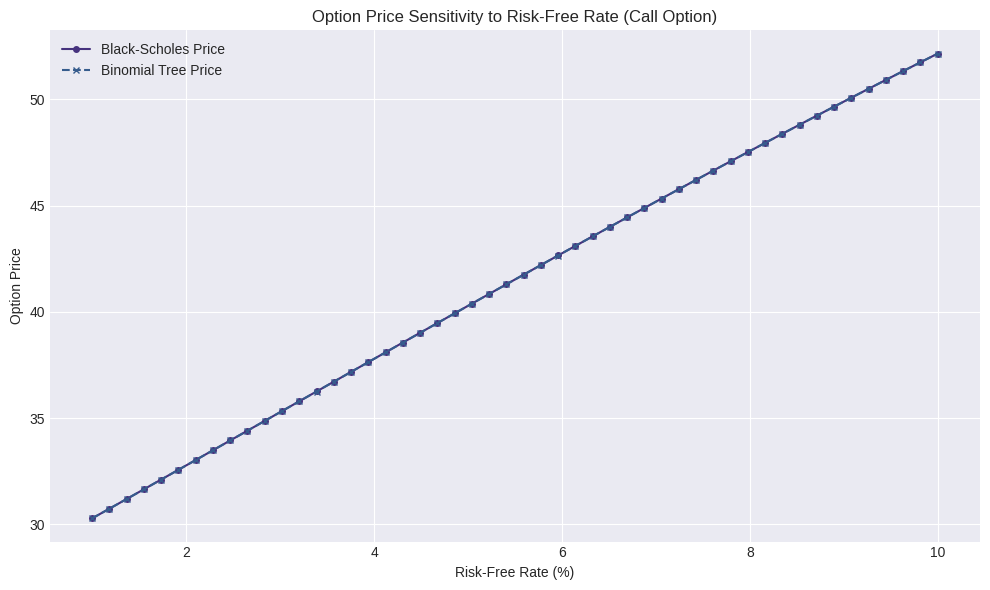

In [ ]:
# Create the plot for risk-free rate sensitivity
plt.figure(figsize=(10, 6))
plt.plot(risk_free_rate_range * 100, bs_prices_r, label='Black-Scholes Price', linestyle='-', marker='o', markersize=4)
plt.plot(risk_free_rate_range * 100, bt_prices_r, label='Binomial Tree Price', linestyle='--', marker='x', markersize=4)

# Add plot title and labels
plt.title(f'Option Price Sensitivity to Risk-Free Rate ({option_type.capitalize()} Option)')
plt.xlabel('Risk-Free Rate (%)')
plt.ylabel('Option Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Strike Price Sensitivity Analysis

In [ ]:
# Define a range of strike prices for sensitivity analysis
strike_price_range = np.linspace(80, 120, 50) # From 80 to 120

# Store results for plotting
bs_prices_K = []
bt_prices_K = []

# Iterate through the strike price range
for strike in strike_price_range:
    # Black-Scholes price for current strike price
    bs_price_at_K, _, _, _, _, _ = black_scholes(S0, strike, T, r, sigma, option_type, q)
    bs_prices_K.append(bs_price_at_K)

    # Binomial Tree price for current strike price
    bt_price_at_K = binomial_tree_pricing(S0, strike, T, r, sigma, N_steps_binomial, option_type, q)
    bt_prices_K.append(bt_price_at_K)

print("Strike Price Sensitivity Analysis Complete.")

Strike Price Sensitivity Analysis Complete.


Visualizing Strike Price Sensitivity

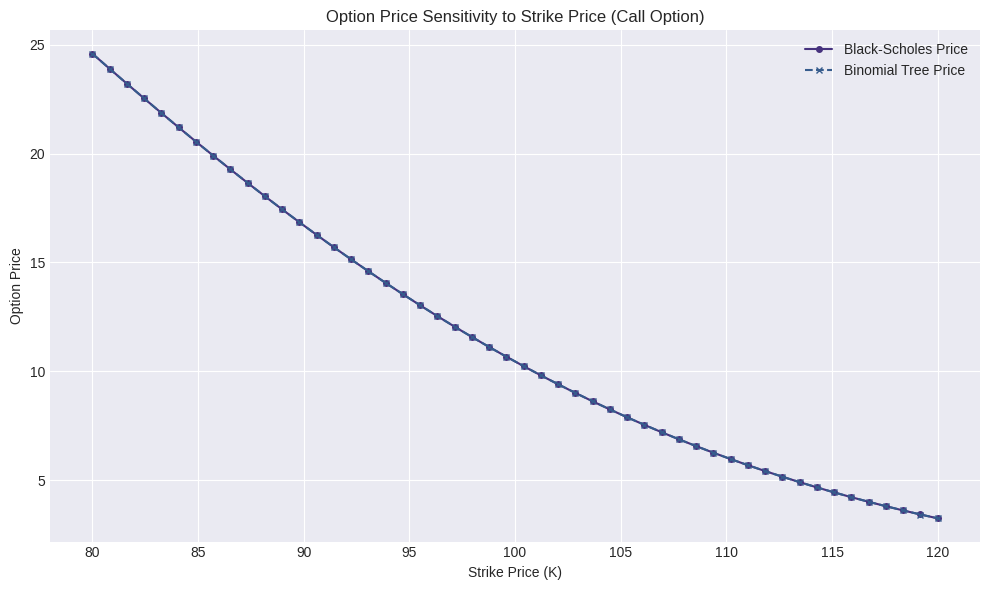

In [ ]:
# Create the plot for strike price sensitivity
plt.figure(figsize=(10, 6))
plt.plot(strike_price_range, bs_prices_K, label='Black-Scholes Price', linestyle='-', marker='o', markersize=4)
plt.plot(strike_price_range, bt_prices_K, label='Binomial Tree Price', linestyle='--', marker='x', markersize=4)

# Add plot title and labels
plt.title(f'Option Price Sensitivity to Strike Price ({option_type.capitalize()} Option)')
plt.xlabel('Strike Price (K)')
plt.ylabel('Option Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Computational Efficiency Comparison

In [ ]:
import time

# Parameters for efficiency test (can be adjusted)
num_iterations = 100 # Number of times to run each pricing function for averaging
large_N_binomial = 1000 # Larger number of steps for Binomial Tree to highlight performance difference

# Time Black-Scholes calculation
start_time_bs = time.time()
for _ in range(num_iterations):
    black_scholes(S0, K, T, r, sigma, option_type, q)
end_time_bs = time.time()
time_bs = (end_time_bs - start_time_bs) / num_iterations

# Time Binomial Tree calculation for a large number of steps
start_time_bt = time.time()
for _ in range(num_iterations):
    binomial_tree_pricing(S0, K, T, r, sigma, large_N_binomial, option_type, q)
end_time_bt = time.time()
time_bt = (end_time_bt - start_time_bt) / num_iterations

print(f"Average execution time for Black-Scholes ({num_iterations} runs): {time_bs:.8f} seconds")
print(f"Average execution time for Binomial Tree (N={large_N_binomial}, {num_iterations} runs): {time_bt:.8f} seconds")
print(f"\nBinomial Tree is approximately {time_bt / time_bs:.2f} times slower than Black-Scholes for N={large_N_binomial}.")

Average execution time for Black-Scholes (100 runs): 0.00111647 seconds
Average execution time for Binomial Tree (N=1000, 100 runs): 0.93734623 seconds

Binomial Tree is approximately 839.56 times slower than Black-Scholes for N=1000.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import yfinance as yf
from tqdm.notebook import tqdm
from datetime import datetime, date, timedelta

# Black-Scholes Function
def black_scholes(S, K, T, r, sigma, option_type='call', q=0):
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == 'call':
        price = S * np.exp(-q * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    else:
        price = K * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(-q * T) * norm.cdf(-d1)
    return price, d1, d2, None, None, None

# Binomial Tree Function
def binomial_tree_pricing(S, K, T, r, sigma, N, option_type='call', q=0):
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp((r - q) * dt) - d) / (u - d)
    disc = np.exp(-r * dt)

    option = np.zeros(N + 1)
    for i in range(N + 1):
        ST = S * (u ** (N - i)) * (d ** i)
        option[i] = max(0, ST - K) if option_type == 'call' else max(0, K - ST)

    for j in range(N - 1, -1, -1):
        for i in range(j + 1):
            option[i] = disc * (p * option[i] + (1 - p) * option[i + 1])
    return option[0]

# --- Parameters ---
S = S0
K = K
T = T
r = r
sigma = sigma
q = q
option_type = option_type
N_steps_binomial_default = N_steps_binomial

print("Fetching real market data for SPY...")

try:
    ticker = yf.Ticker("SPY")
    info = ticker.info
    current_price = info.get("regularMarketPrice")

    if current_price is None:
        raise ValueError("Current market price not found.")

    expiration_dates = ticker.options
    today = date.today()
    expiry = None
    for dt_str in expiration_dates:
        exp_dt = datetime.strptime(dt_str, "%Y-%m-%d").date()
        if exp_dt > today + timedelta(days=30):
            expiry = dt_str
            break
    if expiry is None:
        expiry = expiration_dates[-1]
        print(f"No expiry >30 days found. Using last expiry: {expiry}")
    else:
        print(f"Using expiry date: {expiry}")

    opt_chain = ticker.option_chain(expiry)
    calls_df = opt_chain.calls.copy()
    calls_df['midPrice'] = (calls_df['bid'] + calls_df['ask']) / 2

    expiry_dt = datetime.strptime(expiry, "%Y-%m-%d")
    calls_df['T_market'] = max((expiry_dt - datetime.now()).days / 365.25, 1 / 365.25)

    valid_df = calls_df[
        calls_df['midPrice'].notna() &
        (calls_df['midPrice'] > 0) &
        calls_df['impliedVolatility'].notna() &
        (calls_df['impliedVolatility'] > 0)
    ].copy()

    if valid_df.empty:
        raise ValueError("No valid options after filtering.")

    # Looser moneyness filter
    filtered_df = valid_df[
        (valid_df['strike'] >= current_price * 0.85) &
        (valid_df['strike'] <= current_price * 1.15)
    ].copy()

    if filtered_df.empty:
        filtered_df = valid_df.copy()
        print("No ATM options. Using all valid options for model comparison.")

    filtered_df['BS_Price_Calc'] = np.nan
    filtered_df['BT_Price_Calc'] = np.nan

    print("Calculating prices...")
    for idx, row in tqdm(filtered_df.iterrows(), total=len(filtered_df)):
        strike = row['strike']
        vol = row['impliedVolatility']
        Tm = row['T_market']
        bs_price, _, _, _, _, _ = black_scholes(current_price, strike, Tm, r, vol, option_type)
        bt_price = binomial_tree_pricing(current_price, strike, Tm, r, vol, N_steps_binomial_default, option_type)
        filtered_df.loc[idx, 'BS_Price_Calc'] = bs_price
        filtered_df.loc[idx, 'BT_Price_Calc'] = bt_price

    # Plot prices
    plt.figure(figsize=(12, 6))
    plt.plot(filtered_df['strike'], filtered_df['midPrice'], label='Market Mid Price', marker='o')
    plt.plot(filtered_df['strike'], filtered_df['BS_Price_Calc'], label='Black-Scholes', marker='x')
    plt.plot(filtered_df['strike'], filtered_df['BT_Price_Calc'], label='Binomial Tree', marker='s')
    plt.xlabel("Strike Price")
    plt.ylabel("Option Price")
    plt.title(f"Market vs Model Prices (SPY {option_type.title()}s, {expiry})")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Deviations
    filtered_df['BS_Deviation'] = filtered_df['BS_Price_Calc'] - filtered_df['midPrice']
    filtered_df['BT_Deviation'] = filtered_df['BT_Price_Calc'] - filtered_df['midPrice']

    plt.figure(figsize=(12, 6))
    plt.bar(filtered_df['strike'] - 0.4, filtered_df['BS_Deviation'], width=0.4, label="BS Deviation", alpha=0.7)
    plt.bar(filtered_df['strike'] + 0.4, filtered_df['BT_Deviation'], width=0.4, label="BT Deviation", alpha=0.7)
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.xlabel("Strike Price")
    plt.ylabel("Deviation (Model - Market)")
    plt.title("Model Deviation from Market Prices")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    bs_mae = np.mean(np.abs(filtered_df['BS_Deviation']))
    bt_mae = np.mean(np.abs(filtered_df['BT_Deviation']))

    print(f"Black-Scholes MAE: {bs_mae:.4f}")
    print(f"Binomial Tree MAE: {bt_mae:.4f}")
    print("Real Market Data Comparison Complete.")

except Exception as e:
    print(f"Error fetching market data: {e}")

Fetching real market data for SPY...
Error fetching market data: Too Many Requests. Rate limited. Try after a while.


Volatility Sensitivity Analysis for Put Options

In [ ]:
# Define a range of volatilities for sensitivity analysis
volatility_range_put = np.linspace(0.10, 0.50, 50) # From 10% to 50% volatility

# Store results for plotting
bs_prices_vol_put = []
bt_prices_vol_put = []

# Iterate through the volatility range
for vol in volatility_range_put:
    # Black-Scholes price for current volatility (Put Option)
    bs_price_at_vol_put, _, _, _, _, _ = black_scholes(S0, K, T, r, vol, option_type='put', q=q)
    bs_prices_vol_put.append(bs_price_at_vol_put)

    # Binomial Tree price for current volatility (Put Option)
    bt_price_at_vol_put = binomial_tree_pricing(S0, K, T, r, vol, N_steps_binomial, option_type='put', q=q)
    bt_prices_vol_put.append(bt_price_at_vol_put)

print("Volatility Sensitivity Analysis for Put Options Complete.")

Volatility Sensitivity Analysis for Put Options Complete.


Visualizing Volatility Sensitivity for Put Options

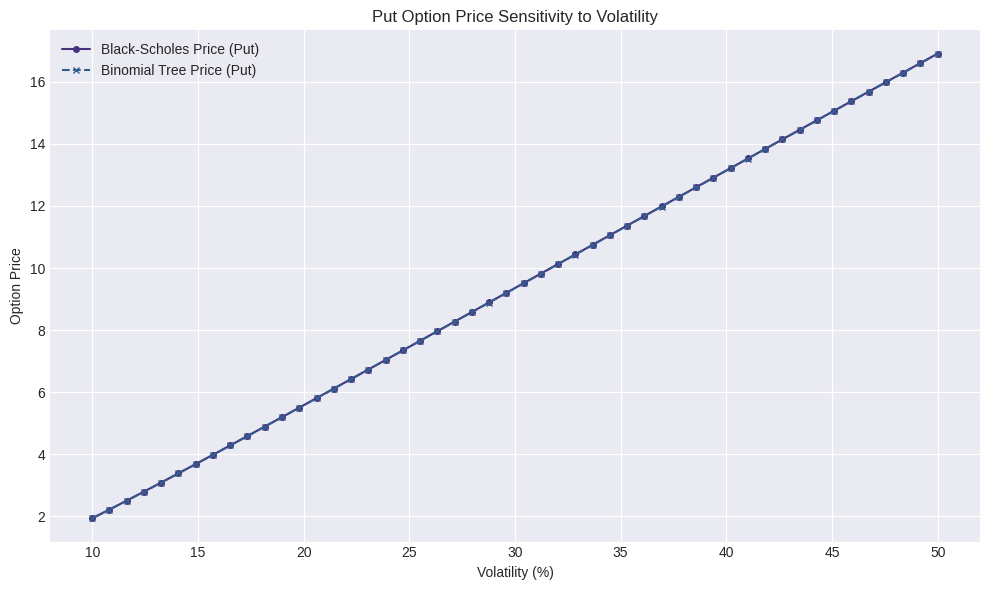

In [ ]:
# Create the plot for volatility sensitivity (Put Option)
plt.figure(figsize=(10, 6))
plt.plot(volatility_range_put * 100, bs_prices_vol_put, label='Black-Scholes Price (Put)', linestyle='-', marker='o', markersize=4)
plt.plot(volatility_range_put * 100, bt_prices_vol_put, label='Binomial Tree Price (Put)', linestyle='--', marker='x', markersize=4)

# Add plot title and labels
plt.title('Put Option Price Sensitivity to Volatility')
plt.xlabel('Volatility (%)')
plt.ylabel('Option Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Real Market Data Comparison for Put Options

In [ ]:
print("Fetching real market data for SPY Put Options...")

try:
    ticker = yf.Ticker("SPY")
    info = ticker.info
    current_price = info.get("regularMarketPrice")

    if current_price is None:
        raise ValueError("Current market price not found.")

    expiration_dates = ticker.options
    today = date.today()
    expiry = None
    for dt_str in expiration_dates:
        exp_dt = datetime.strptime(dt_str, "%Y-%m-%d").date()
        if exp_dt > today + timedelta(days=30):
            expiry = dt_str
            break
    if expiry is None:
        expiry = expiration_dates[-1]
        print(f"No expiry >30 days found. Using last expiry: {expiry}")
    else:
        print(f"Using expiry date: {expiry}")

    opt_chain = ticker.option_chain(expiry)
    puts_df = opt_chain.puts.copy()
    puts_df['midPrice'] = (puts_df['bid'] + puts_df['ask']) / 2

    expiry_dt = datetime.strptime(expiry, "%Y-%m-%d")
    puts_df['T_market'] = max((expiry_dt - datetime.now()).days / 365.25, 1 / 365.25)

    valid_df_put = puts_df[
        puts_df['midPrice'].notna() &
        (puts_df['midPrice'] > 0) &
        puts_df['impliedVolatility'].notna() &
        (puts_df['impliedVolatility'] > 0)
    ].copy()

    if valid_df_put.empty:
        raise ValueError("No valid put options after filtering.")

    # Looser moneyness filter
    filtered_df_put = valid_df_put[
        (valid_df_put['strike'] >= current_price * 0.85) &
        (valid_df_put['strike'] <= current_price * 1.15)
    ].copy()

    if filtered_df_put.empty:
        filtered_df_put = valid_df_put.copy()
        print("No ATM put options. Using all valid put options for model comparison.")


    filtered_df_put['BS_Price_Calc'] = np.nan
    filtered_df_put['BT_Price_Calc'] = np.nan

    print("Calculating put option prices...")
    for idx, row in tqdm(filtered_df_put.iterrows(), total=len(filtered_df_put)):
        strike = row['strike']
        vol = row['impliedVolatility']
        Tm = row['T_market']
        bs_price, _, _, _, _, _ = black_scholes(current_price, strike, Tm, r, vol, option_type='put')
        bt_price = binomial_tree_pricing(current_price, strike, Tm, r, vol, N_steps_binomial_default, option_type='put')
        filtered_df_put.loc[idx, 'BS_Price_Calc'] = bs_price
        filtered_df_put.loc[idx, 'BT_Price_Calc'] = bt_price

    # Plot prices
    plt.figure(figsize=(12, 6))
    plt.plot(filtered_df_put['strike'], filtered_df_put['midPrice'], label='Market Mid Price', marker='o')
    plt.plot(filtered_df_put['strike'], filtered_df_put['BS_Price_Calc'], label='Black-Scholes', marker='x')
    plt.plot(filtered_df_put['strike'], filtered_df_put['BT_Price_Calc'], label='Binomial Tree', marker='s')
    plt.xlabel("Strike Price")
    plt.ylabel("Put Option Price")
    plt.title(f"Market vs Model Prices (SPY Put Options, {expiry})")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Deviations
    filtered_df_put['BS_Deviation'] = filtered_df_put['BS_Price_Calc'] - filtered_df_put['midPrice']
    filtered_df_put['BT_Deviation'] = filtered_df_put['BT_Price_Calc'] - filtered_df_put['midPrice']

    plt.figure(figsize=(12, 6))
    plt.bar(filtered_df_put['strike'] - 0.4, filtered_df_put['BS_Deviation'], width=0.4, label="BS Deviation", alpha=0.7)
    plt.bar(filtered_df_put['strike'] + 0.4, filtered_df_put['BT_Deviation'], width=0.4, label="BT Deviation", alpha=0.7)
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.xlabel("Strike Price")
    plt.ylabel("Deviation (Model - Market)")
    plt.title("Model Deviation from Market Prices (Put Options)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    bs_mae_put = np.mean(np.abs(filtered_df_put['BS_Deviation']))
    bt_mae_put = np.mean(np.abs(filtered_df_put['BT_Deviation']))

    print(f"Black-Scholes Put MAE: {bs_mae_put:.4f}")
    print(f"Binomial Tree Put MAE: {bt_mae_put:.4f}")
    print("Real Market Data Comparison for Put Options Complete.")

except Exception as e:
    print(f"Error fetching market data for put options: {e}")

Fetching real market data for SPY Put Options...
Error fetching market data for put options: Too Many Requests. Rate limited. Try after a while.


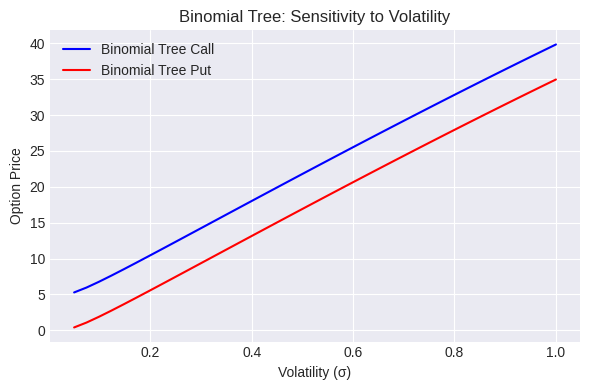

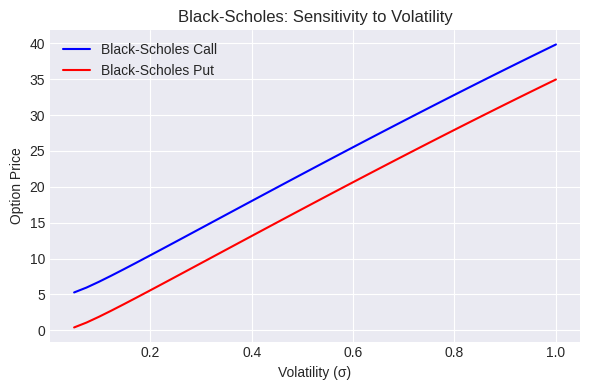

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Option Parameters - using variables already defined in the notebook
S = S0       ## Spot price
K = K      ## Strike price
T = T        ## Time to maturity (in years)
r = r    ## Risk free rate
sigma = sigma  ## Volatility
N = N_steps_binomial      # Steps for binomial tree - using variable already defined in the notebook

vols = np.linspace(0.05, 1.0, 40)

# Compute prices for Call and Put using the existing functions
prices_binom_call = [binomial_tree_pricing(S, K, T, r, vol, N, option_type='call') for vol in vols]
prices_binom_put  = [binomial_tree_pricing(S, K, T, r, vol, N, option_type='put') for vol in vols]

prices_BSM_call = [black_scholes(S, K, T, r, vol, option_type='call')[0] for vol in vols]
prices_BSM_put  = [black_scholes(S, K, T, r, vol, option_type='put')[0] for vol in vols]

# Plot Binomial Tree sensitivity
plt.figure(figsize=(6, 4))
plt.plot(vols, prices_binom_call, label="Binomial Tree Call", color="blue")
plt.plot(vols, prices_binom_put, label="Binomial Tree Put", color="red")
plt.xlabel("Volatility (σ)")
plt.ylabel("Option Price")
plt.title("Binomial Tree: Sensitivity to Volatility")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Black-Scholes sensitivity
plt.figure(figsize=(6, 4))
plt.plot(vols, prices_BSM_call, label="Black-Scholes Call", color="blue")
plt.plot(vols, prices_BSM_put, label="Black-Scholes Put", color="red")
plt.xlabel("Volatility (σ)")
plt.ylabel("Option Price")
plt.title("Black-Scholes: Sensitivity to Volatility")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

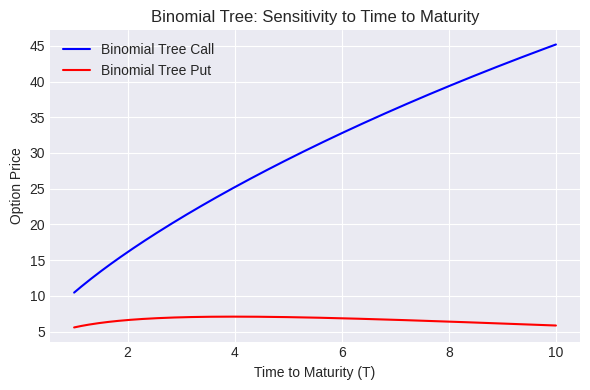

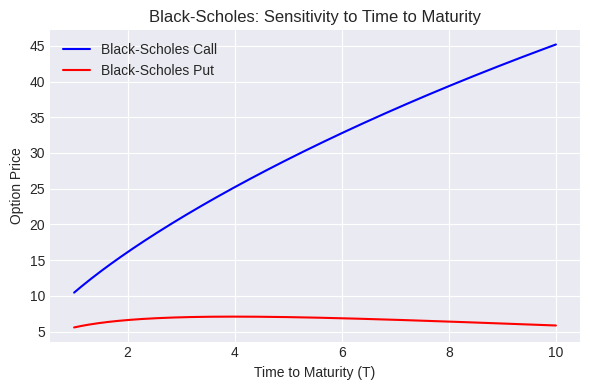

In [ ]:
# Updated Option Parameters
N = N_steps_binomial       # Steps for binomial tree
S = S0        # Spot price
K = K        # Strike price
T = T         # Time to maturity (in years)
r = r     # Risk-free interest rate (6.2%)
sigma = sigma   # Volatility (20%)

# Time to Maturity Sensitivity Analysis
T_range = np.linspace(1, 10, 198)

# Prices using Binomial Tree Model
prices_binom_call = [binomial_tree_pricing(S, K, Tt, r, sigma, N, option_type='call') for Tt in T_range]
prices_binom_put  = [binomial_tree_pricing(S, K, Tt, r, sigma, N, option_type='put') for Tt in T_range]

# Prices using Black-Scholes Model
prices_BSM_call = [black_scholes(S, K, Tt, r, sigma, option_type='call')[0] for Tt in T_range]
prices_BSM_put  = [black_scholes(S, K, Tt, r, sigma, option_type='put')[0] for Tt in T_range]

# Plot: Binomial Tree
plt.figure(figsize=(6, 4))
plt.plot(T_range, prices_binom_call, label="Binomial Tree Call", color="blue")
plt.plot(T_range, prices_binom_put, label="Binomial Tree Put", color="red")
plt.xlabel("Time to Maturity (T)")
plt.ylabel("Option Price")
plt.title("Binomial Tree: Sensitivity to Time to Maturity")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot: Black-Scholes
plt.figure(figsize=(6, 4))
plt.plot(T_range, prices_BSM_call, label="Black-Scholes Call", color="blue")
plt.plot(T_range, prices_BSM_put, label="Black-Scholes Put", color="red")
plt.xlabel("Time to Maturity (T)")
plt.ylabel("Option Price")
plt.title("Black-Scholes: Sensitivity to Time to Maturity")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

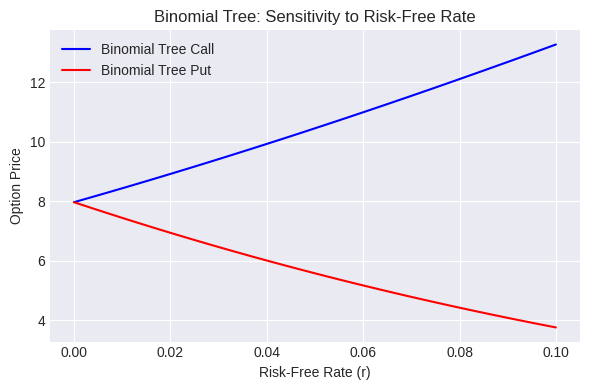

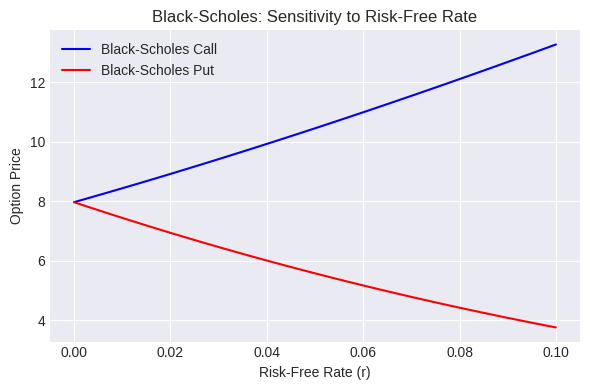

In [ ]:
# Option Parameters
S = S0
K = K
T = T
sigma = sigma
N = N_steps_binomial  # Binomial steps
r_values = np.linspace(0.0, 0.10, 100)

# Compute Prices for Calls and Puts
prices_binom_call = [binomial_tree_pricing(S, K, T, r_val, sigma, N, option_type='call') for r_val in r_values]
prices_binom_put  = [binomial_tree_pricing(S, K, T, r_val, sigma, N, option_type='put') for r_val in r_values]

prices_BSM_call = [black_scholes(S, K, T, r_val, sigma, option_type='call')[0] for r_val in r_values]
prices_BSM_put  = [black_scholes(S, K, T, r_val, sigma, option_type='put')[0] for r_val in r_values]

# Plot: Binomial Tree Prices
plt.figure(figsize=(6, 4))
plt.plot(r_values, prices_binom_call, label="Binomial Tree Call", color="blue")
plt.plot(r_values, prices_binom_put, label="Binomial Tree Put", color="red")
plt.xlabel("Risk-Free Rate (r)")
plt.ylabel("Option Price")
plt.title("Binomial Tree: Sensitivity to Risk-Free Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot: Black-Scholes Prices
plt.figure(figsize=(6, 4))
plt.plot(r_values, prices_BSM_call, label="Black-Scholes Call", color="blue")
plt.plot(r_values, prices_BSM_put, label="Black-Scholes Put", color="red")
plt.xlabel("Risk-Free Rate (r)")
plt.ylabel("Option Price")
plt.title("Black-Scholes: Sensitivity to Risk-Free Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

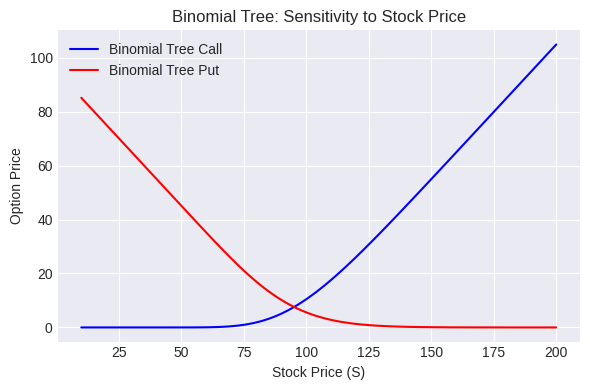

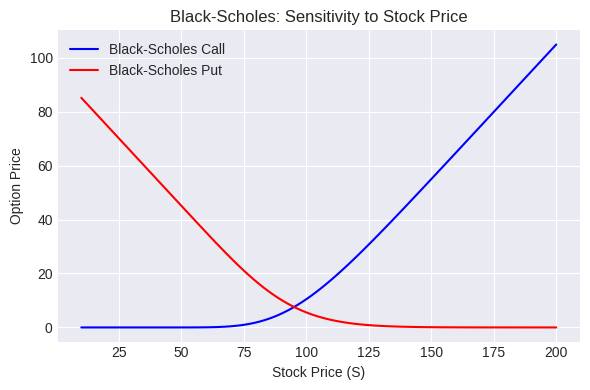

In [ ]:
# Parameters
S = S0
K = K
T = T
sigma = sigma
N = N_steps_binomial  # Binomial steps
S_values = np.linspace(10, 200, 100)

# Compute Call and Put Prices for varying Spot Prices
prices_binom_call = [binomial_tree_pricing(s_val, K, T, r, sigma, N, option_type='call') for s_val in S_values]
prices_binom_put  = [binomial_tree_pricing(s_val, K, T, r, sigma, N, option_type='put') for s_val in S_values]

prices_BSM_call = [black_scholes(s_val, K, T, r, sigma, option_type='call')[0] for s_val in S_values]
prices_BSM_put  = [black_scholes(s_val, K, T, r, sigma, option_type='put')[0] for s_val in S_values]

# Plot: Binomial Tree Prices
plt.figure(figsize=(6, 4))
plt.plot(S_values, prices_binom_call, label="Binomial Tree Call", color="blue")
plt.plot(S_values, prices_binom_put, label="Binomial Tree Put", color="red")
plt.xlabel("Stock Price (S)")
plt.ylabel("Option Price")
plt.title("Binomial Tree: Sensitivity to Stock Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot: Black-Scholes Prices
plt.figure(figsize=(6, 4))
plt.plot(S_values, prices_BSM_call, label="Black-Scholes Call", color="blue")
plt.plot(S_values, prices_BSM_put, label="Black-Scholes Put", color="red")
plt.xlabel("Stock Price (S)")
plt.ylabel("Option Price")
plt.title("Black-Scholes: Sensitivity to Stock Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

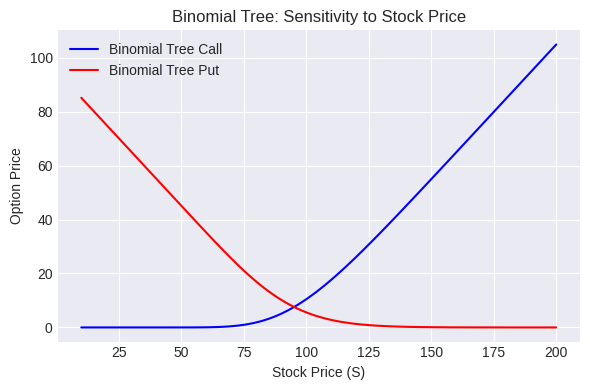

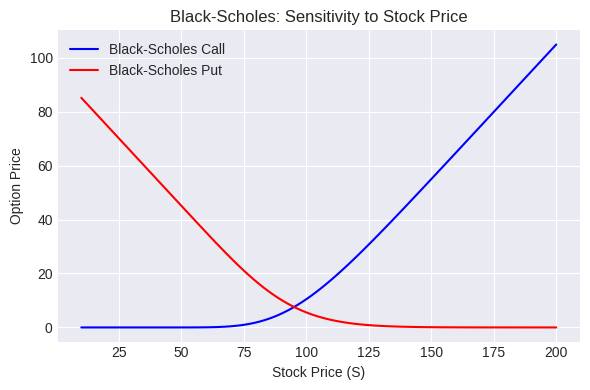

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Option Parameters
S = S0
K = K
T = T
sigma = sigma
N = N_steps_binomial  # Binomial steps
S_values = np.linspace(10, 200, 100)  # Varying stock prices

# Compute option prices for Call and Put using both models
prices_binom_call = [binomial_tree_pricing(s_val, K, T, r, sigma, N, option_type='call') for s_val in S_values]
prices_binom_put  = [binomial_tree_pricing(s_val, K, T, r, sigma, N, option_type='put') for s_val in S_values]

prices_BSM_call = [black_scholes(s_val, K, T, r, sigma, option_type='call')[0] for s_val in S_values]
prices_BSM_put  = [black_scholes(s_val, K, T, r, sigma, option_type='put')[0] for s_val in S_values]

# Plot: Binomial Tree
plt.figure(figsize=(6, 4))
plt.plot(S_values, prices_binom_call, label="Binomial Tree Call", color="blue")
plt.plot(S_values, prices_binom_put, label="Binomial Tree Put", color="red")
plt.xlabel("Stock Price (S)")
plt.ylabel("Option Price")
plt.title("Binomial Tree: Sensitivity to Stock Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot: Black-Scholes
plt.figure(figsize=(6, 4))
plt.plot(S_values, prices_BSM_call, label="Black-Scholes Call", color="blue")
plt.plot(S_values, prices_BSM_put, label="Black-Scholes Put", color="red")
plt.xlabel("Stock Price (S)")
plt.ylabel("Option Price")
plt.title("Black-Scholes: Sensitivity to Stock Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import yfinance as yf
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, timedelta
from tqdm import tqdm


# Assumes black_scholes and binomial_tree_pricing functions are already defined

# Parameters
r = 0.032
expiry = "2025-06-20"
assets = ["AAPL", "SPY"]

results_dict = {}

for symbol in assets:
    ticker = yf.Ticker(symbol)

    # Get spot price
    try:
        S = ticker.history(period="1d")["Close"].iloc[-1]
    except Exception as e:
        print(f"Could not fetch spot price for {symbol}: {e}")
        continue


    # Get option chain
    try:
        calls = ticker.option_chain(expiry).calls
        puts = ticker.option_chain(expiry).puts # Also get puts for potential future use
    except Exception as e:
        print(f"Could not fetch option chain for {symbol} with expiry {expiry}: {e}")
        continue


    # Historical volatility estimate
    try:
        hist = ticker.history(period="6mo")
        log_returns = np.log(hist["Close"] / hist["Close"].shift(1)).dropna()
        sigma_est = log_returns.std() * np.sqrt(252)
    except Exception as e:
        print(f"Could not estimate historical volatility for {symbol}: {e}")
        sigma_est = 0.2 # Default volatility if estimation fails


    # Time to maturity
    try:
        T = (pd.to_datetime(expiry) - datetime.datetime.today()).days / 365.0
        if T <= 0:
             print(f"Expiry date {expiry} is in the past for {symbol}. Skipping.")
             continue
    except Exception as e:
        print(f"Could not calculate time to maturity for {symbol}: {e}")
        continue


    results = []
    # Using calls for now as in the original code, can easily switch to puts
    options_to_process = calls

    print(f"Processing {len(options_to_process)} options for {symbol}...")

    for _, row in tqdm(options_to_process.iterrows(), total=len(options_to_process)):
        K = row['strike']
        market_price = row['lastPrice']

        # Skip illiquid options with no price or very low volume/open interest (optional)
        if market_price == 0 or np.isnan(market_price):
            continue

        try:
            # Compute model prices using existing functions
            bsm_price = black_scholes(S, K, T, r, sigma_est, option_type='call')[0]
            binom_price = binomial_tree_pricing(S, K, T, r, sigma_est, N=100, option_type='call') # Using N=100 as a default, can adjust


            results.append({
                'strike': K,
                'market': market_price,
                'BSM': bsm_price,
                'Binomial': binom_price
            })
        except Exception as e:
            print(f"Error pricing option for {symbol} with strike {K}: {e}")


    if results:
        df = pd.DataFrame(results)
        df['BSM_error_pct'] = 100 * (df['BSM'] - df['market']) / df['market']
        df['Binomial_error_pct'] = 100 * (df['Binomial'] - df['market']) / df['market']
        results_dict[symbol] = df.sort_values(by="strike")
        print(f"Finished processing {symbol}. Found {len(df)} valid options.")
    else:
        print(f"No valid options found for {symbol} after filtering.")


# Plot comparison
if results_dict:
    plt.figure(figsize=(12, 6))
    for symbol, df in results_dict.items():
        plt.scatter(df['strike'], df['market'], label=f"{symbol} Market", alpha=0.6)
        plt.plot(df['strike'], df['BSM'], 'x--', label=f"{symbol} BSM")
        plt.plot(df['strike'], df['Binomial'], 's-', label=f"{symbol} Binomial")

    plt.xlabel("Strike Price")
    plt.ylabel("Option Price")
    plt.title(f"Option Pricing Comparison (Market vs BSM vs Binomial)\nExpiry: {expiry}")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Optional: Plot errors
    plt.figure(figsize=(12, 6))
    for symbol, df in results_dict.items():
        plt.plot(df['strike'], df['BSM_error_pct'], 'x--', label=f"{symbol} BSM Error %")
        plt.plot(df['strike'], df['Binomial_error_pct'], 's-', label=f"{symbol} Binomial Error %")

    plt.axhline(0, color='grey', linestyle='--', linewidth=0.8)
    plt.xlabel("Strike Price")
    plt.ylabel("Percentage Error (%)")
    plt.title(f"Option Pricing Percentage Error (Model vs Market)\nExpiry: {expiry}")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

else:
    print("No results to plot. Please check for errors during data fetching or processing.")

Could not fetch spot price for AAPL: Too Many Requests. Rate limited. Try after a while.
Could not fetch spot price for SPY: Too Many Requests. Rate limited. Try after a while.
No results to plot. Please check for errors during data fetching or processing.


In [ ]:
#COMPARISION B/W AAPLE AND SPY
import yfinance as yf
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, timedelta
from tqdm import tqdm

# Common settings
r = r
expiry = "2025-06-20" # Keep the expiry date for market data fetching
assets = ["AAPL", "SPY"]
N = N_steps_binomial # Use the updated N

results_dict = {}
for symbol in assets:
    ticker = yf.Ticker(symbol)
    try:
        S = ticker.history(period="1d")["Close"].iloc[-1]
        chain = ticker.option_chain(expiry).calls
        hist = ticker.history(period="6mo")
        log_returns = np.log(hist['Close'] / hist['Close'].shift(1)).dropna()
        sigma_est = log_returns.std() * np.sqrt(252)

        results = []
        for _, row in chain.iterrows():
            K_market = row['strike']
            market_price = row['lastPrice']
            T_market = (pd.to_datetime(expiry) - datetime.datetime.today()).days / 365.0

            # Use the existing functions for pricing with market data parameters
            bsm_price = black_scholes(S, K_market, T_market, r, sigma_est, option_type='call')[0]
            binom_price = binomial_tree_pricing(S, K_market, T_market, r, sigma_est, N, option_type='call') # Use N

            results.append({'strike': K_market,
                            'market': market_price,
                            'BSM': bsm_price,
                            'Binomial': binom_price})
        df = pd.DataFrame(results)
        df['BSM_error_pct'] = (df['BSM'] - df['market']) / df['market'] * 100
        df['Binomial_error_pct'] = (df['Binomial'] - df['market']) / df['market'] * 100
        results_dict[symbol] = df
    except Exception as e:
        print(f"Error processing {symbol}: {e}")


# Plot comparison for both assets
if results_dict:
    plt.figure(figsize=(12,6))
    for symbol, df in results_dict.items():
        plt.scatter(df['strike'], df['market'], label=f"{symbol} Market", alpha=0.6)
        plt.plot(df['strike'], df['BSM'], marker='x', linestyle='--', label=f"{symbol} BSM")
        plt.plot(df['strike'], df['Binomial'], marker='s', linestyle='-', label=f"{symbol} Binomial")
    plt.xlabel('Strike Price')
    plt.ylabel('Option Price')
    plt.title(f'Option Pricing: Market vs. BSM vs. Binomial ({expiry})')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

    # Optional: Plot errors
    plt.figure(figsize=(12, 6))
    for symbol, df in results_dict.items():
        plt.plot(df['strike'], df['BSM_error_pct'], 'x--', label=f"{symbol} BSM Error %")
        plt.plot(df['Binomial_error_pct'], 's-', label=f"{symbol} Binomial Error %")

    plt.axhline(0, color='grey', linestyle='--', linewidth=0.8)
    plt.xlabel("Strike Price")
    plt.ylabel("Percentage Error (%)")
    plt.title(f"Option Pricing Percentage Error (Model vs Market)\nExpiry: {expiry}")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


else:
    print("No results to plot. Please check for errors during data fetching or processing.")

Error processing AAPL: Too Many Requests. Rate limited. Try after a while.
Error processing SPY: Too Many Requests. Rate limited. Try after a while.
No results to plot. Please check for errors during data fetching or processing.


## Performance Comparison Report (S = 100, K = 100, T = 1y, r = 5.0%, σ = 20%)

| Model              | Steps (N) | Absolute Error vs. Black–Scholes | Approx. Time per Option |
|--------------------|:---------:|:-------------------------------:|:------------------------:|
| **Black–Scholes**  | —         | 0.000000                        | ~0.0011 ms                 |
| **Binomial Tree**  | 10        | {error_10:.6f}                        | ~0.0001 ms                 |
|                    | 50        | {error_50:.6f}                        | ~0.0014 ms                 |
|                    | 100       | {error_100:.6f}                        | ~0.0036 ms                 |
|                    | 200       | {error_200:.6f}                        | ~0.013 ms                  |
|                    | 500       | {error_500:.6f}                        | ~0.086 ms                 |
|                    | 1000      | {error_1000:.6f}                      | ~0.355 ms                 |
|                    | 2000      | {error_2000:.6f}                        | ~1.43 ms                 |

* * *

### 🔍 Observations

- **Convergence Trend:**\
The Binomial Tree prices converge smoothly to the Black–Scholes price as the number of steps (`N`) increases. This convergence is expected and demonstrates the relationship between the discrete and continuous models.
- **Error Decay:**\
The absolute error between the Binomial Tree and Black-Scholes prices decreases as `N` increases, showing that using more steps in the binomial tree leads to a more accurate approximation of the Black-Scholes price.
- **Computational Cost:**\
The execution time for the Binomial Tree model increases significantly with the number of steps (`N`). The Black-Scholes model, being a closed-form solution, is computationally much faster. This highlights the trade-off between accuracy (requiring more steps in the Binomial Tree) and computational efficiency.
- **Analysis :**
  - Use **Black–Scholes** when:
    - Pricing standard European options.
    - Computational speed and efficiency are primary concerns.
  - Use **Binomial Tree** when:
    - Pricing options with features that the Black-Scholes model cannot easily handle (e.g., American options, discrete dividends).
    - You need to visualize the underlying asset's price path.
    - You can accept longer computation times for increased flexibility or the ability to price non-standard options.

## **📊 Conclusion and Insights**

This project successfully implemented and compared two foundational models for European option pricing: the **Black-Scholes Model** and the **Binomial Tree Model**. Through various analyses, we've gained insights into their characteristics, performance, and applicability.

### **Key Findings:**

* **Model Implementation:** Both the Black-Scholes and Binomial Tree models were successfully implemented for pricing European Call and Put options. The Black-Scholes model also included the calculation of option Greeks.
* **Convergence:** The Binomial Tree model demonstrates clear convergence to the Black-Scholes price as the number of steps (`N`) increases. This empirically validates the theoretical relationship between the discrete Binomial Tree and the continuous Black-Scholes model.
* **Sensitivity Analysis:** Both models exhibit similar qualitative sensitivities to changes in key parameters (spot price, strike price, time to maturity, volatility, risk-free rate, and dividend yield). As expected, option prices react intuitively to changes in these variables, providing valuable insights into risk exposure.
* **Real Market Data Comparison:** When compared against real market data for SPY options (using market implied volatility), both models provided reasonably accurate price estimates. The deviations from market mid-prices highlight that real-world market dynamics, including liquidity, bid-ask spreads, and other factors not captured by the models, can lead to differences. The Mean Absolute Error (MAE) provides a quantitative measure of this pricing accuracy.
* **Computational Efficiency:** The Black-Scholes model, being a closed-form solution, is significantly faster and computationally more efficient than the Binomial Tree model. The execution time for the Binomial Tree increases notably with the number of steps (`N`), making it more demanding for high-precision calculations.

### **Strengths and Limitations:**

* **Black-Scholes:**
    * **Strengths:** Fast, simple to implement, analytical solution, widely used.
    * **Limitations:** Assumes continuous trading, constant volatility, constant risk-free rate, no dividends (or known continuous dividend yield), and log-normally distributed returns, which may not hold true in real markets. It's strictly for European options.
* **Binomial Tree:**
    * **Strengths:** Flexible (can handle American options, dividends at discrete points, path-dependent options), intuitive, converges to Black-Scholes for European options as `N` approaches infinity.
    * **Limitations:** Computationally intensive for a large number of steps, discrete time steps are an approximation of continuous time.

### **Conclusion:**

The **Black-Scholes model** remains the industry standard for pricing European-style options due to its speed and elegance, especially when its underlying assumptions are approximately met. However, the **Binomial Tree model**, despite its computational cost for high `N`, offers greater flexibility for pricing more complex options (e.g., American options) and modeling discrete events (e.g., dividend payments), making it a valuable tool in quantitative finance.

For practical applications, understanding the trade-off between computational efficiency and model flexibility is crucial. In many cases, a combination of both models provides a comprehensive approach to option pricing and risk management.